C:\Users\zuzia\AppData\Local\Temp\ipykernel_24148\1156645789.py:20: RuntimeWarning: divide by zero encountered in power
  f_x = (4 * x)**(-1/2) * np.exp(-np.sqrt(x))


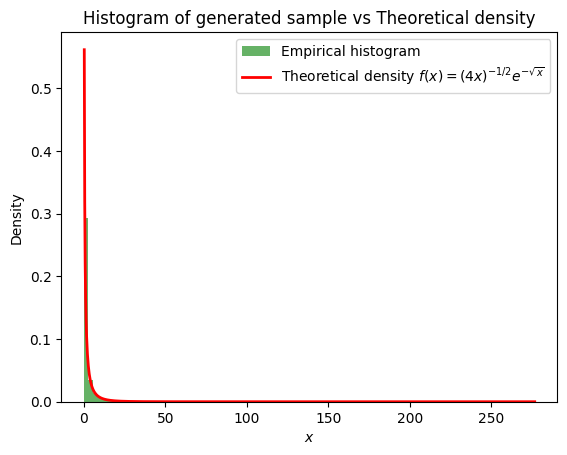

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def GEN(N):
    # Generowanie N losowych zmiennych z rozkładu jednostajnego U(0,1)
    U = np.random.uniform(0, 1, N)
    # Zastosowanie odwrotnej dystrybuanty
    X = (-np.log(1 - U))**2
    return X

# Generowanie próbki o wielkości 10^7
N = 10**7
sample = GEN(N)

plt.hist(sample, bins=100, density=True, alpha=0.6, color='g', label='Empirical histogram')

# Generowanie wartości dla teoretycznej gęstości
x = np.linspace(0, np.max(sample), 1000)
f_x = (4 * x)**(-1/2) * np.exp(-np.sqrt(x))

# Rysowanie teoretycznej gęstości
plt.plot(x, f_x, 'r-', lw=2, label='Theoretical density $f(x)=(4x)^{-1/2}e^{-\sqrt{x}}$')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Histogram of generated sample vs Theoretical density')
plt.legend()
plt.show()


In [2]:
import numpy as np

def FUN(R, delta_t, N):
    # Liczba kroków w każdej trajektorii
    max_steps = int(1 / delta_t) * 10  # Ustalamy duży maksymalny krok, żeby zapobiec nieskończonym pętlom

    # Inicjalizacja zmiennej przechowującej czasy pierwszego wyjścia
    exit_times = np.zeros(N)
    
    # Symulacja Monte Carlo
    for i in range(N):
        # Inicjalizacja procesów Wienera
        W1 = 0
        W2 = 0
        t = 0

        # Symulacja aż do wyjścia poza koło
        for step in range(max_steps):
            # Aktualizacja czasu
            t += delta_t
            # Generowanie przyrostów procesu Wienera
            dW1 = np.sqrt(delta_t) * np.random.randn()
            dW2 = np.sqrt(delta_t) * np.random.randn()
            # Aktualizacja wartości procesów Wienera
            W1 += dW1
            W2 += dW2

            # Sprawdzenie, czy proces opuścił koło o promieniu R
            if W1**2 + W2**2 > R**2:
                exit_times[i] = t
                break

    # Wyestymowanie średniego czasu wyjścia
    mean_exit_time = np.mean(exit_times)
    
    return mean_exit_time

# Przykład użycia funkcji
R = 1 / 2
delta_t = 1e-4
N = 10**4

# Wywołanie funkcji FUN z podanymi parametrami
mean_exit_time = FUN(R, delta_t, N)

print(f'Wyestymowana średnia zmiennej T: {mean_exit_time}')
print(f'Poprawny wynik: {R**2 / 2}')


Wyestymowana średnia zmiennej T: 0.12797018999999782
Poprawny wynik: 0.125
